In [18]:
import pyxatu
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd

In [ ]:
xatu = pyxatu.PyXatu()

In [ ]:
start_date = datetime(2025, 7, 21)
end_date = datetime(2025, 7, 28)

all_chunks = []

while start_date < end_date:
    next_date = start_date + timedelta(days=1)
    
    where_clause = (
        f"slot_start_date_time >= '{start_date.strftime('%Y-%m-%d %H:%M:%S')}' "
        f"AND slot_start_date_time < '{next_date.strftime('%Y-%m-%d %H:%M:%S')}'"
    )
    
    chunk = xatu.get_transactions(
        columns="from, hash, type",
        where=where_clause
    )
    
    all_chunks.append(chunk)
    start_date = next_date

transactions = pd.concat(all_chunks, ignore_index=True)
transactions


2025-08-05 21:34:08,986 - INFO - Executing query: SELECT DISTINCT from, hash, type FROM canonical_beacon_block_execution_transaction FINAL WHERE slot_start_date_time >= '2025-07-21 00:00:00' AND slot_start_date_time < '2025-07-22 00:00:00' AND meta_network_name = 'mainnet'
2025-08-05 21:34:15,802 - INFO - Status code: 200
2025-08-05 21:34:15,803 - INFO - Content-Length: None
2025-08-05 21:34:15,837 - INFO - First 100 chars of response: 0x06A6066f3050CeDd2c962f3f0aCe2830bFCB28Ff	0xabadd341e7e91036c7285955734789e922ad7d60c4dd07c0cfd535d
2025-08-05 21:34:15,837 - INFO - Query executed in 6.85 seconds
2025-08-05 21:34:17,865 - INFO - Executing query: SELECT DISTINCT from, hash, type FROM canonical_beacon_block_execution_transaction FINAL WHERE slot_start_date_time >= '2025-07-22 00:00:00' AND slot_start_date_time < '2025-07-23 00:00:00' AND meta_network_name = 'mainnet'
2025-08-05 21:34:23,914 - INFO - Status code: 200
2025-08-05 21:34:23,914 - INFO - Content-Length: None
2025-08-05 21:34:

,from,hash,type
0,0x06A6066f3050CeDd2c962f3f0aCe2830bFCB28Ff,0xabadd341e7e91036c7285955734789e922ad7d60c4dd...,2
1,0xF1BA5368bD4a7A1195F9b65894db4ce3261A4192,0x86e035339ee119a15c665c9ff1af2a4ca41d31a3dcf3...,2
2,0x83c2a667612377805716024c9C26E43c9606dABF,0x15009b588522c898f6845beb871ff51939605a12eba3...,2
3,0xae2Fc483527B8EF99EB5D9B44875F005ba1FaE13,0xe9feeac41ad6472298ba528dc8f4322ffc13a5da53ea...,2
4,0xa6AC5A1500C504671442562594CDCE4ff4ca5EB6,0x36a24b02fb7c425bbcc11b26be02eb25f247ccdd5be4...,2
...,...,...,...
11073262,0x8216874887415e2650D12D53Ff53516F04a74FD7,0xe98280fc675bc98f5f54dc07e612e26c1c2ba0f0d047...,2
11073263,0xd881C98a605E25096d3FD393C3C85faf574e1949,0x1455259c2df1d13cc4bcf05ebd52ed8244ccb315e13e...,0
11073264,0x88DCdd4A0A58b7e2208805D547043c37dca2b6Dc,0xfe2ae5fac3c7b7870d4e5073de14d7beef373f406037...,2
11073265,0xbEDAC4DaE6C13077F326879b06D57667EC0eCbE8,0xde77801f556925e280b7ecda78aac09d4139683eb994...,2


In [ ]:
def get_last_hex_char(series):
    return series.str[-1].str.lower()

hash_counts_all = get_last_hex_char(transactions["hash"]).value_counts().sort_index()
hash_counts_type3 = get_last_hex_char(transactions[transactions["type"] == 3]["hash"]).value_counts().sort_index()

from_counts_all = get_last_hex_char(transactions["from"]).value_counts().sort_index()
from_counts_type3 = get_last_hex_char(transactions[transactions["type"] == 3]["from"]).value_counts().sort_index()


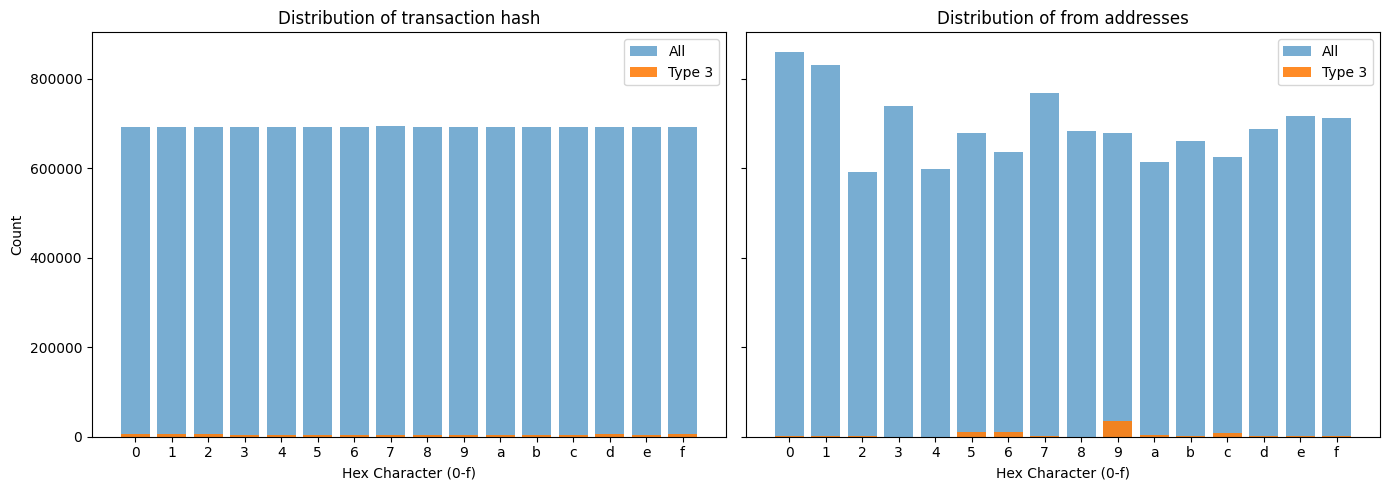

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axes[0].bar(hash_counts_all.index, hash_counts_all.values, alpha=0.6, label='All')
axes[0].bar(hash_counts_type3.index, hash_counts_type3.values, alpha=0.9, label='Type 3')
axes[0].set_title("Distribution of transaction hash")
axes[0].set_xlabel("Hex Character (0-f)")
axes[0].set_ylabel("Count")
axes[0].legend()

axes[1].bar(from_counts_all.index, from_counts_all.values, alpha=0.6, label='All')
axes[1].bar(from_counts_type3.index, from_counts_type3.values, alpha=0.9, label='Type 3')
axes[1].set_title("Distribution of from addresses")
axes[1].set_xlabel("Hex Character (0-f)")
axes[1].legend()

plt.tight_layout()
plt.show()

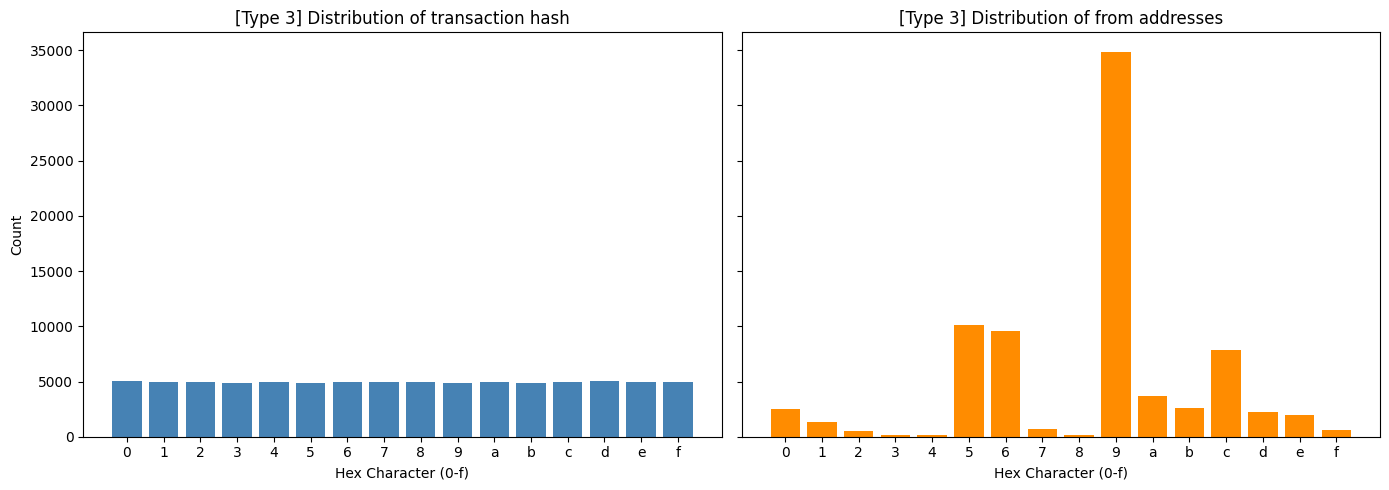

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axes[0].bar(hash_counts_type3.index, hash_counts_type3.values, color='steelblue')
axes[0].set_title("[Type 3] Distribution of transaction hash")
axes[0].set_xlabel("Hex Character (0-f)")
axes[0].set_ylabel("Count")

axes[1].bar(from_counts_type3.index, from_counts_type3.values, color='darkorange')
axes[1].set_title("[Type 3] Distribution of from addresses")
axes[1].set_xlabel("Hex Character (0-f)")

plt.tight_layout()
plt.show()
